In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import pickle
import warnings
from collections import Counter
from sklearn import metrics

In [2]:
df=pd.read_csv(r"./M2 final.csv")
#reading

In [3]:
df.shape
#shape check

(40434, 25)

In [85]:
df.corr().iloc[-1,:]
#Just see the last line for correlation with the variables 1
#corr check

MONTH               0.097289
DAY_OF_MONTH       -0.053589
DAY_OF_WEEK         0.023138
DEP_DELAY           0.959286
TAXI_OUT            0.223131
CRS_ELAPSED_TIME   -0.074815
DISTANCE           -0.070041
CRS_DEP_M           0.039253
DEP_TIME_M          0.134308
WHEELS_OFF_M        0.131156
CRS_ARR_M           0.043642
Pred_Wheels_On      0.042557
Temperature        -0.021962
Dew Point           0.082458
Humidity            0.101433
Wind Speed          0.064173
Wind Gust           0.071634
Pressure           -0.105812
sch_dep            -0.069133
sch_arr            -0.085937
ARR_DELAY           1.000000
Name: ARR_DELAY, dtype: float64

<AxesSubplot:>

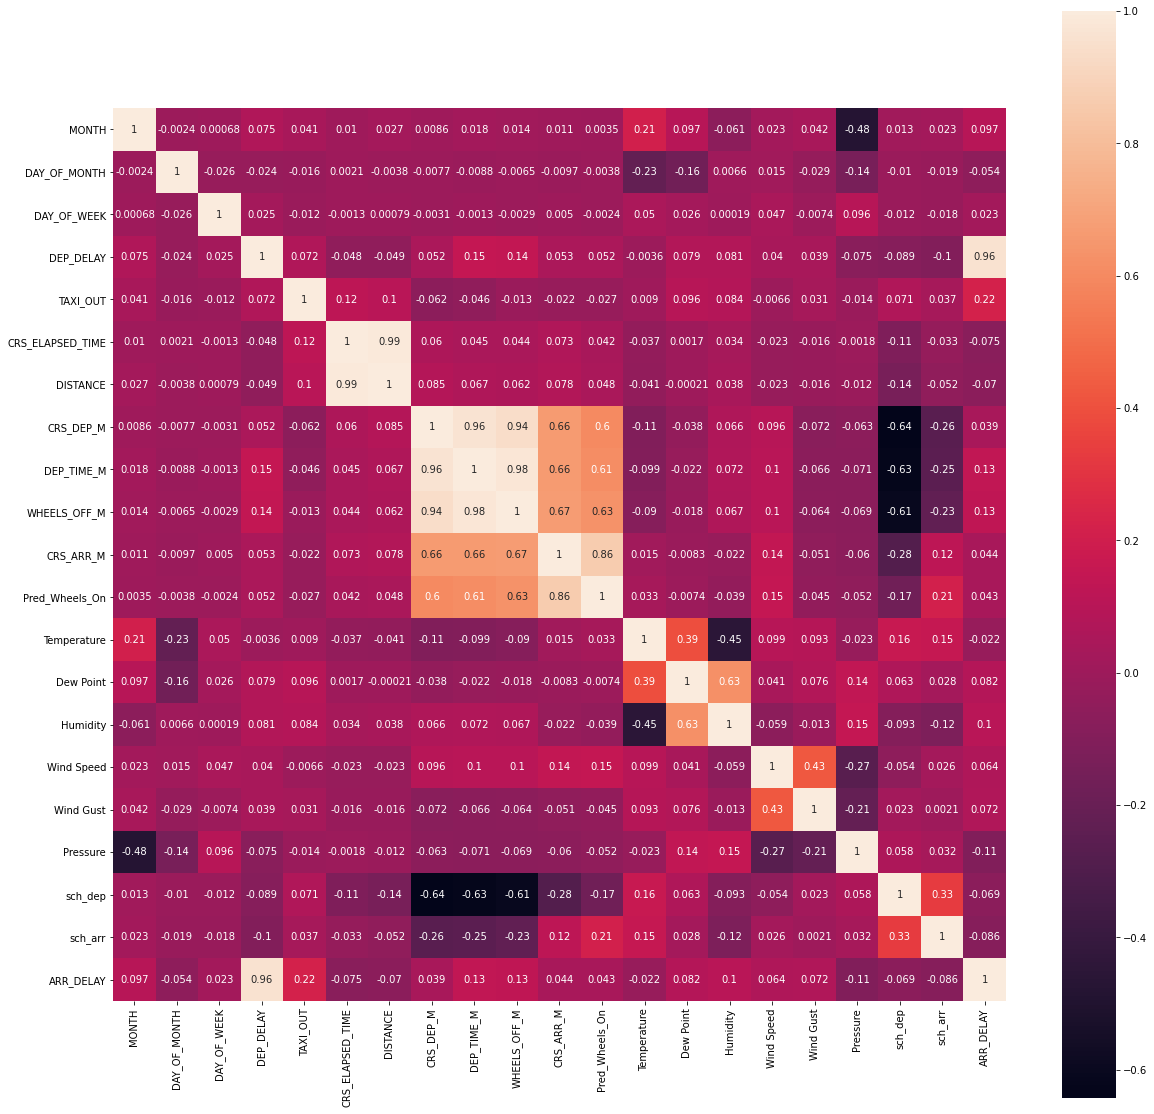

In [86]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True,annot =True)

In [4]:
print(df.isnull().values.any())
df.isnull().sum()
#null check

False


MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEP_DELAY            0
TAXI_OUT             0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
WHEELS_OFF_M         0
CRS_ARR_M            0
Pred_Wheels_On       0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
ARR_DELAY            0
dtype: int64

In [88]:
pd.set_option('display.max_colwidth', None)
df.head(5)

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN  DEP_DELAY  \
0     11             1            5                OO    BOI         -4   
1     11             1            5                OO    RDD         -9   
2     11             1            5                OO    ACV         -3   
3     11             1            5                OO    PHX         -5   
4     11             1            5                OO    SBA         -3   

   TAXI_OUT  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  Humidity  \
0        13                85       522        360  ...         34        56   
1        14                73       199        365  ...         36        47   
2        10                75       250        360  ...         36        47   
3        13               133       651        305  ...         36        47   
4        11                79       262        360  ...         36        47   

   Wind  Wind Speed  Wind Gust  Pressure  Condition sch_dep  sch_arr  \
0  CALM           0          0     30.14       Fair      24        6   
1  CALM           0          0     30.16       Fair      28       23   
2  CALM           0          0     30.16       Fair      28       23   
3  CALM           0          0     30.16       Fair      28       23   
4  CALM           0          0     30.16       Fair      28       23   

   ARR_DELAY  
0        -29  
1        -24  
2        -14  
3        -20  
4        -14  

[5 rows x 25 columns]

In [5]:
df.describe()

MONTH  DAY_OF_MONTH   DAY_OF_WEEK     DEP_DELAY      TAXI_OUT  \
count  40434.000000  40434.000000  40434.000000  40434.000000  40434.000000   
mean       8.002473     15.817728      3.970841     16.121729     19.170080   
std        4.969453      8.845867      1.995832     57.478494     10.780272   
min        1.000000      1.000000      1.000000    -32.000000      1.000000   
25%        1.000000      8.000000      2.000000     -6.000000     12.000000   
50%       11.000000     16.000000      4.000000     -2.000000     16.000000   
75%       12.000000     23.000000      6.000000     12.000000     23.000000   
max       12.000000     31.000000      7.000000   1912.000000    155.000000   

       CRS_ELAPSED_TIME      DISTANCE     CRS_DEP_M    DEP_TIME_M  \
count      40434.000000  40434.000000  40434.000000  40434.000000   
mean         203.286887   1191.250853    809.493001    821.198645   
std          118.098231    893.514742    295.839561    302.979847   
min           48.000000     66.000000     14.000000      1.000000   
25%           99.000000    414.000000    533.000000    549.000000   
50%          140.000000    679.000000    820.000000    834.000000   
75%          305.000000   2139.000000   1070.000000   1082.000000   
max          428.000000   2704.000000   1439.000000   1439.000000   

       WHEELS_OFF_M  ...  Pred_Wheels_On   Temperature     Dew Point  \
count  40434.000000  ...    40434.000000  40434.000000  40434.000000   
mean     837.270342  ...      890.481179     54.991022     46.228892   
std      303.784628  ...      333.488691      4.624905      4.948194   
min        1.000000  ...        0.000000     41.000000     29.000000   
25%      569.000000  ...      634.000000     52.000000     43.000000   
50%      849.000000  ...      897.000000     55.000000     47.000000   
75%     1099.000000  ...     1184.000000     58.000000     50.000000   
max     1439.000000  ...     1440.000000     73.000000     57.000000   

           Humidity    Wind Speed     Wind Gust      Pressure       sch_dep  \
count  40434.000000  40434.000000  40434.000000  40434.000000  40434.000000   
mean      73.535317      8.385023      1.118168     30.076563     29.094425   
std       12.306909      5.990685      5.783806      0.183316      9.504281   
min       23.000000      0.000000      0.000000     29.500000      0.000000   
25%       67.000000      5.000000      0.000000     29.990000     23.000000   
50%       75.000000      7.000000      0.000000     30.100000     29.000000   
75%       83.000000     12.000000      0.000000     30.190000     36.000000   
max       97.000000     36.000000     47.000000     30.580000     54.000000   

            sch_arr     ARR_DELAY  
count  40434.000000  40434.000000  
mean      31.675916      8.136247  
std       10.504367     61.579573  
min        0.000000    -78.000000  
25%       26.000000    -20.000000  
50%       31.000000     -8.000000  
75%       39.000000     13.000000  
max       56.000000   1909.000000  

[8 rows x 21 columns]

In [6]:
#Assigning Variables
x=df.iloc[:,:-1]
x=x.drop(['Condition',],axis=1)
y=df.iloc[:,-1]
print(y.shape)
x.shape

(40434,)


(40434, 23)

In [7]:
y=y-x['DEP_DELAY']

In [8]:
print(y.head(5))
y=y.apply(lambda x: 1 if x>=0 else 0)
y.head(5)

0   -25
1   -15
2   -11
3   -15
4   -11
dtype: int64


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [9]:
x.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
ORIGIN                object
DEP_DELAY              int64
TAXI_OUT               int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
WHEELS_OFF_M           int64
CRS_ARR_M              int64
Pred_Wheels_On         int64
Temperature            int64
Dew Point              int64
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
sch_dep                int64
sch_arr                int64
dtype: object

In [10]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=(0.1/0.9))
print(x_train.shape,x_test.shape,x_val.shape)

(32346, 23) (4044, 23) (4044, 23)


In [11]:
x3=pd.concat([x_train,x_val],axis=0,join='inner').reset_index(drop=True)
y3=pd.concat([y_train,y_val],axis=0,join='inner').reset_index(drop=True)

In [12]:
category_list=['OP_UNIQUE_CARRIER','ORIGIN','Wind']
#cat_var=['OP_UNIQUE_CARRIER','ORIGIN','Wind','Condition','MONTH','DAY_OF_MONTH','DAY_OF_WEEK']
cat_var=[]

In [13]:
from sklearn.preprocessing import LabelEncoder 
lb_make = LabelEncoder() 
for s in category_list: 
    x3[s] = lb_make.fit_transform(x3[s]) 
    x_test[s] = lb_make.transform(x_test[s]) 
    print(lb_make.transform(lb_make.classes_))
    print(lb_make.classes_)
    x3[s] = x3[s].astype('int')  
    x_test[s]=x_test[s].astype('int') 
print(x3.shape,x_test.shape) 
print(x3.dtypes,x_test.dtypes)


[0 1 2 3 4 5 6 7 8]
['AA' 'AS' 'B6' 'DL' 'F9' 'HA' 'OO' 'UA' 'WN']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81]
['ABQ' 'ACV' 'ASE' 'ATL' 'AUS' 'BFL' 'BNA' 'BOI' 'BOS' 'BUR' 'BWI' 'BZN'
 'CLE' 'CLT' 'CMH' 'CVG' 'DAL' 'DCA' 'DEN' 'DFW' 'DTW' 'EGE' 'EUG' 'EWR'
 'FAT' 'FLL' 'GEG' 'HDN' 'HNL' 'IAD' 'IAH' 'IND' 'JAC' 'JFK' 'KOA' 'LAS'
 'LAX' 'LGB' 'LIH' 'MCI' 'MCO' 'MDW' 'MFR' 'MIA' 'MMH' 'MRY' 'MSN' 'MSP'
 'MSY' 'MTJ' 'OGG' 'OKC' 'OMA' 'ONT' 'ORD' 'OTH' 'PAE' 'PDX' 'PHL' 'PHX'
 'PIT' 'PSC' 'PSP' 'RDD' 'RDM' 'RDU' 'RNO' 'SAN' 'SAT' 'SBA' 'SBP' 'SEA'
 'SLC' 'SMF' 'SNA' 'STL' 'STS' 'SUN' 'TPA' 'TUS' 'TWF' 'XNA']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
(36390, 23) (4044, 23)
MON

In [14]:
columns={'MONTH':'month','DAY_OF_MONTH':'day','DAY_OF_WEEK':'week','OP_UNIQUE_CARRIER':'airline','ORIGIN':'ori',
       'DEP_DELAY':'dep_del','TAXI_OUT':'taxi','CRS_ELAPSED_TIME':'sch_elp', 'DISTANCE':'dist', 'CRS_DEP_M':'sch_dep_m',
       'DEP_TIME_M':'act_dep_m','WHEELS_OFF_M':'wh_off','Pred_Wheels_On':'wh_on','CRS_ARR_M':'sch_arr_m','Temperature':'temp', 'Dew Point':'dew', 'Humidity':'hum', 'Wind':'wind','Wind Speed':'w_spd',
       'Wind Gust':'gust', 'Pressure':'pres', 'Condition':'cond'}
cat_var=list(map(lambda st: columns[st],cat_var))
x3=x3.rename(columns=columns)
x_test=x_test.rename(columns=columns)
print(cat_var)
#print(x3_train.dtypes,x3_test.dtypes)

[]


In [15]:
import lightgbm as lgb
import catboost as ctb
from hyperopt import fmin, tpe, hp,STATUS_OK, STATUS_FAIL, Trials
from hyperopt.pyll import scope


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test=x_test
        self.y_test=y_test
        #self.y_test.iloc[-1]=1

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        return result, trials

    def lgb_clf(self, para):
        reg = lgb.LGBMClassifier(**para['clf_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['clf_params'])
        return self.train_reg(reg, para)

    def train_reg(self, clf, para):
        clf.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = clf.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [16]:
x3.to_csv("x_m2.csv",index=False)
x_test.to_csv("x_test2.csv",index=False)
y3.to_csv("y_m2.csv",index=False)
y_test.to_csv("y_test2.csv",index=False)

In [17]:
x3=pd.read_csv("x_m2.csv")
x_test=pd.read_csv("x_test2.csv")
y3=pd.read_csv("y_m2.csv")
y_test=pd.read_csv("y_test2.csv")

In [18]:
lgb_clf_params = {
    'learning_rate':  hp.uniform('learning_rate',0.1,1),
    'reg_alpha':  hp.uniform('reg_alpha', 0.1,20),
    'reg_lambda': hp.uniform('reg_lambda', 0.1,20),
    'is_unbalance':True,
    'min_child_samples': scope.int(hp.quniform('min_child_samples', 3, 20, q=1)),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.75,1),
    'n_estimators': scope.int(hp.quniform('n_estimators', 2000, 20000, q=1))
}
lgb_fit_params = {
    'eval_metric': 'auc',
    'early_stopping_rounds': 25,
    'verbose': False,
    'categorical_feature': cat_var
}
lgb_para = dict()
lgb_para['clf_params'] = lgb_clf_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: -metrics.roc_auc_score(y, pred)

In [19]:
obj=HPOpt(x3,x_test,y3,y_test)
warnings.filterwarnings("ignore")
# idea try oversampling again for once after undersmpling 
lgb_opt,trials= obj.process(fn_name='lgb_clf', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=1000)
lgb_opt['n_estimators']=int(lgb_opt['n_estimators'])
lgb_opt['min_child_samples']=int(lgb_opt['min_child_samples'])
reg_ = lgb.LGBMClassifier(**lgb_opt)
reg_.fit(x3,y3)
print(metrics.log_loss(reg_.predict(x3),y3))
print(metrics.log_loss(reg_.predict(x_test),y_test))
print(metrics.average_precision_score(reg_.predict(x_test),y_test))
print(metrics.classification_report(reg_.predict(x_test),y_test))
print(metrics.roc_auc_score(reg_.predict(x_test),y_test))
print(reg_.best_score_)
print(lgb_opt)

100%|██████████| 1000/1000 [22:06<00:00,  1.33s/trial, best loss: -0.8236941255372295]
1.6581589935743315
4.919542002009893
0.5599358691735024
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3127
           1       0.66      0.77      0.71       917

    accuracy                           0.86      4044
   macro avg       0.79      0.83      0.81      4044
weighted avg       0.87      0.86      0.86      4044

0.8269736376352721
defaultdict(<class 'collections.OrderedDict'>, {})
{'colsample_bytree': 0.9133993423201463, 'learning_rate': 0.17183253972038526, 'min_child_samples': 20, 'n_estimators': 9968, 'reg_alpha': 5.77548760157789, 'reg_lambda': 13.929433502396876}


In [23]:
reg5=reg_

In [24]:
print(metrics.log_loss(y3,reg5.predict(x3)))
print(metrics.log_loss(y_test,reg5.predict(x_test)))
prob=reg5.predict_proba(x_test)
prob=np.array(prob)[:,1]
#thresholds = np.arange(0, 1, 0.001)
print(metrics.average_precision_score(reg5.predict(x_test),y_test))
print(metrics.classification_report(reg5.predict(x_test),y_test))
print(metrics.roc_auc_score(reg5.predict(x_test),y_test))
print(lgb_opt)

1.6581334389766036
4.919511157005167
0.5599358691735024
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3127
           1       0.66      0.77      0.71       917

    accuracy                           0.86      4044
   macro avg       0.79      0.83      0.81      4044
weighted avg       0.87      0.86      0.86      4044

0.8269736376352721
{'colsample_bytree': 0.9133993423201463, 'learning_rate': 0.17183253972038526, 'min_child_samples': 20, 'n_estimators': 9968, 'reg_alpha': 5.77548760157789, 'reg_lambda': 13.929433502396876}


In [25]:
reg5.booster_.save_model('arr_light_one_class.txt')

defaultdict(<class 'collections.OrderedDict'>, {})


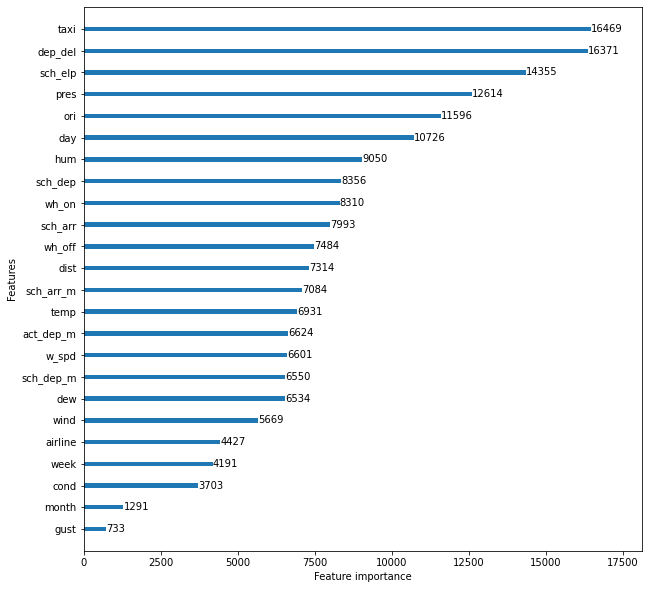

In [193]:
print(reg5.best_score_)
lgb.plot_importance(reg5,grid=False, figsize=(10,10), title=None)
plt.show()

In [8]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
lgbm = LGBMClassifier()
model1= lgb.Booster(model_file=r'./arr_light_one_class.txt')

In [9]:
model1.lower_bound()

-76.04902590905199

In [10]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [22]:
modelt=model1
modelt.params["objective"] = "binary"
explainer = shap.TreeExplainer(modelt)

None


In [21]:
shap_values = explainer.shap_values(x3)

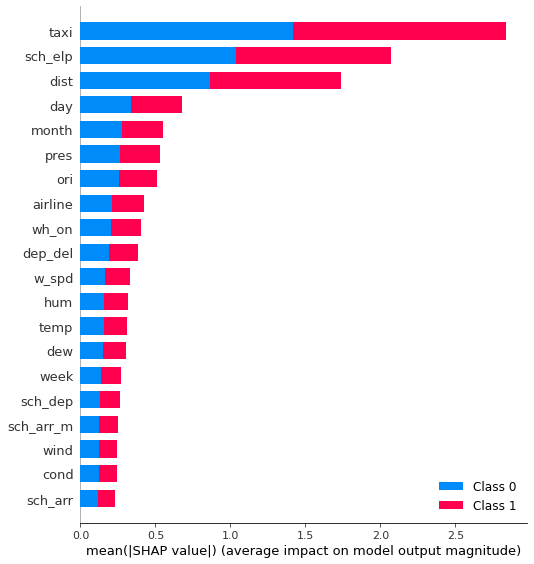

In [15]:
shap.summary_plot(shap_values, x3)

month 0


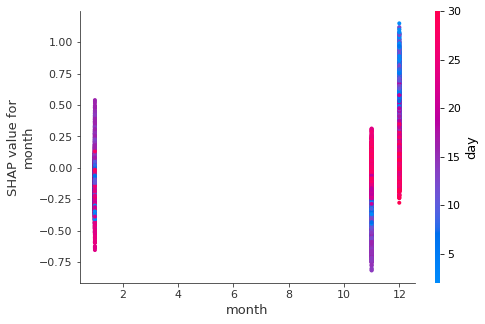

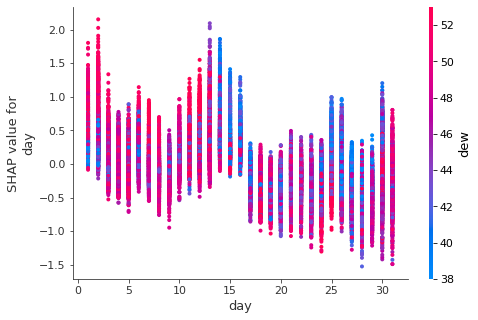

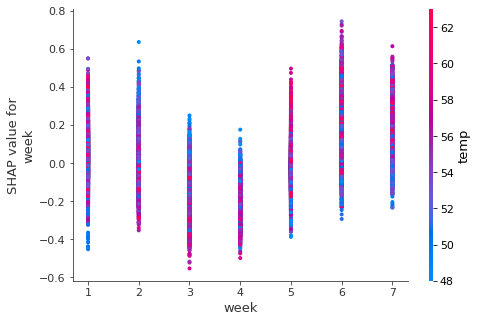

day 1


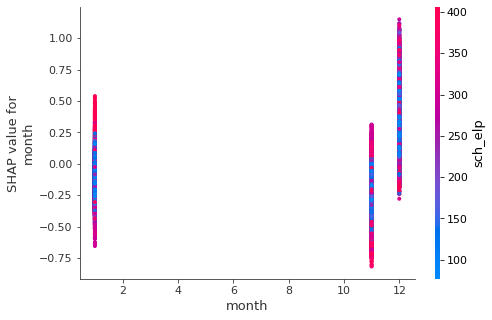

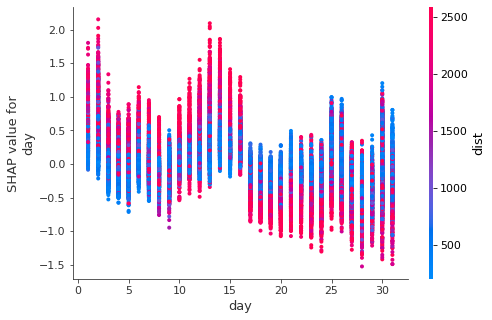

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


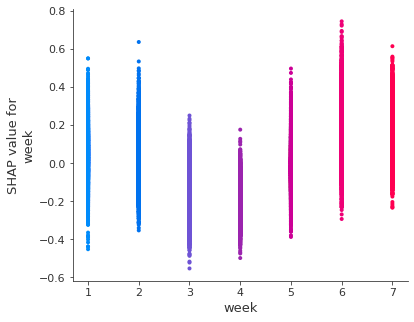

week 2


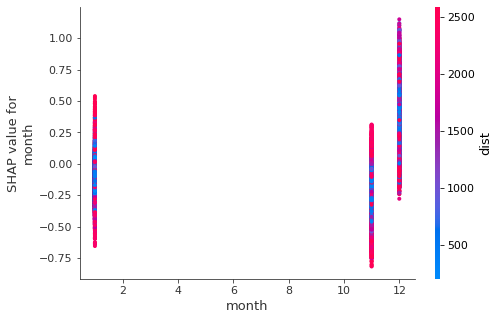

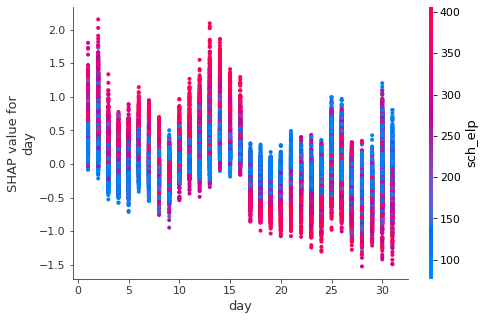

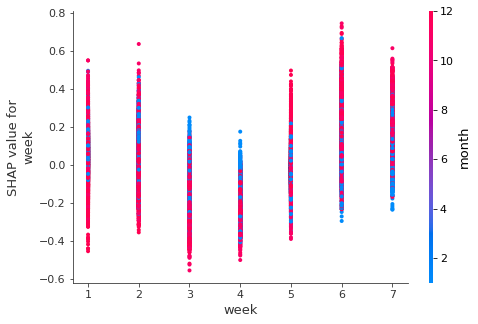

airline 3


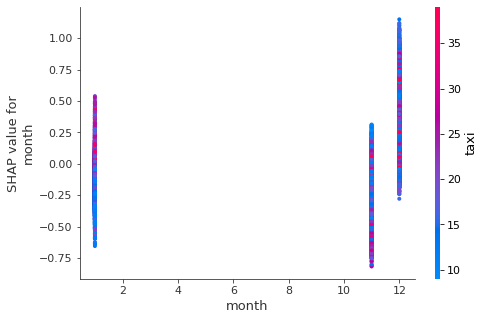

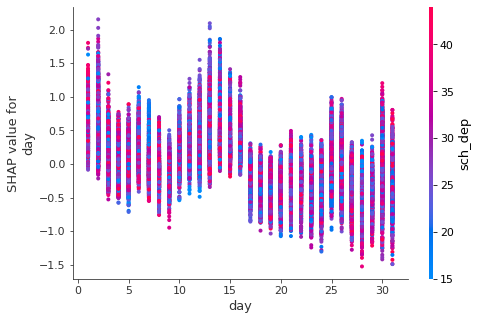

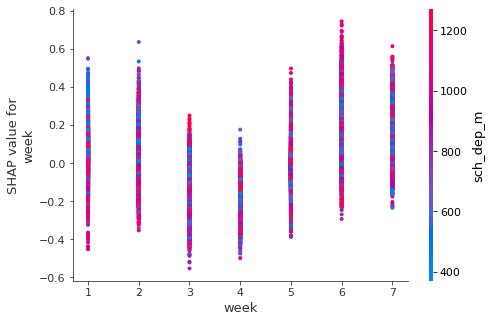

ori 4


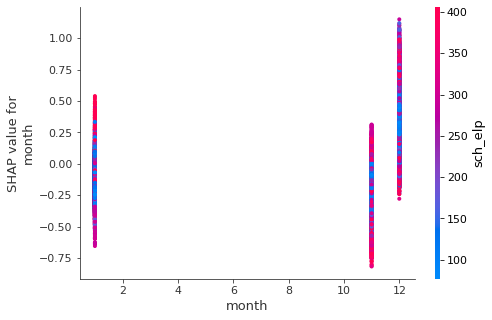

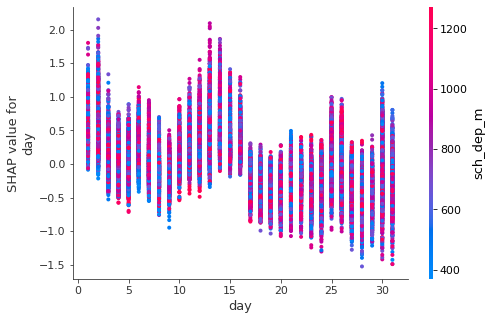

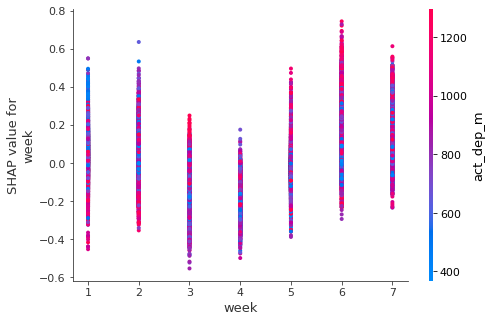

dep_del 5


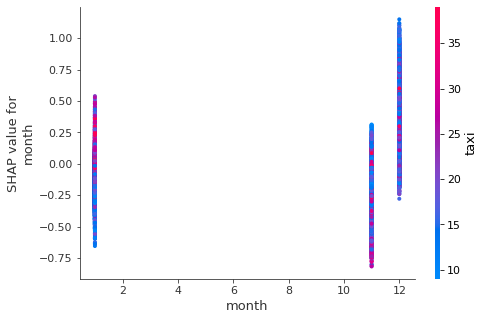

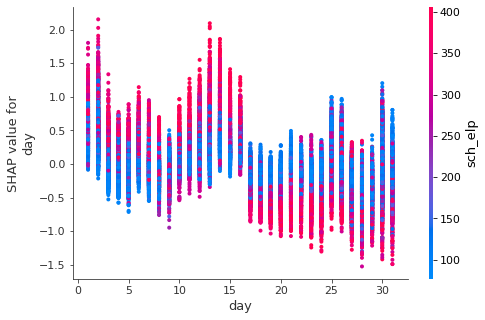

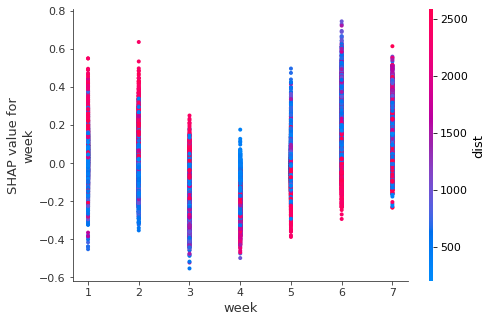

taxi 6


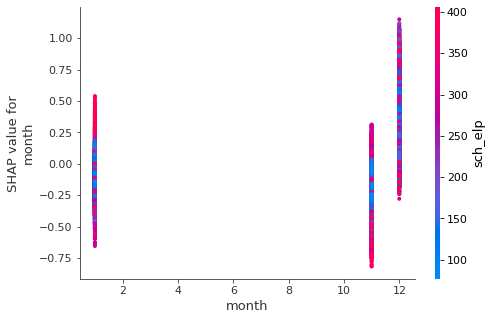

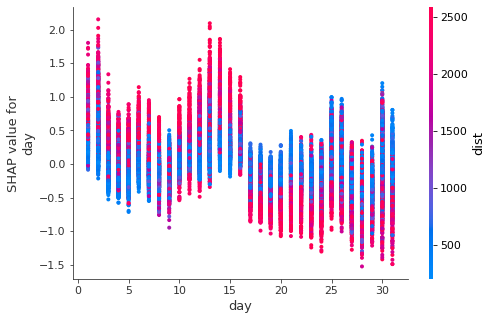

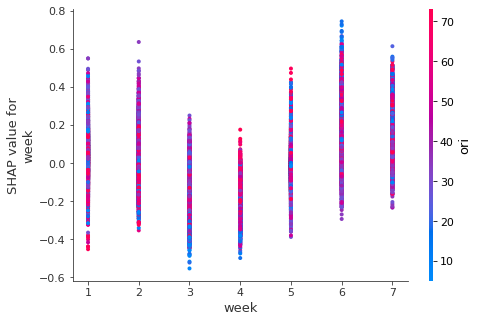

sch_elp 7


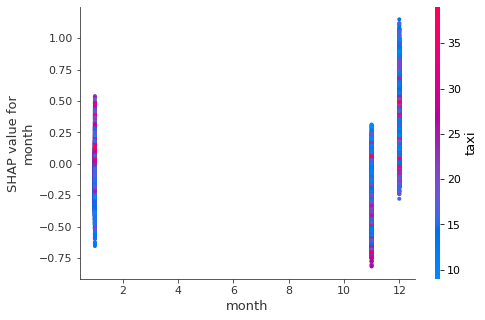

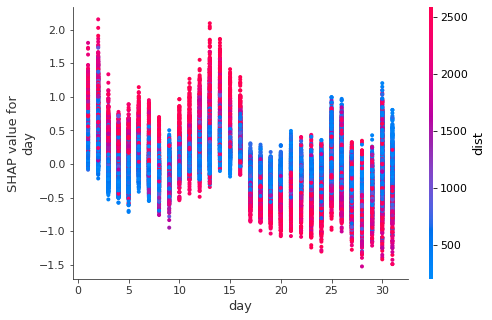

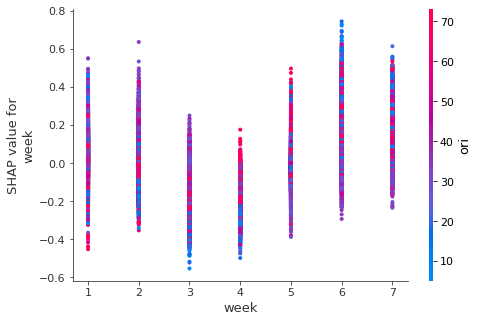

dist 8


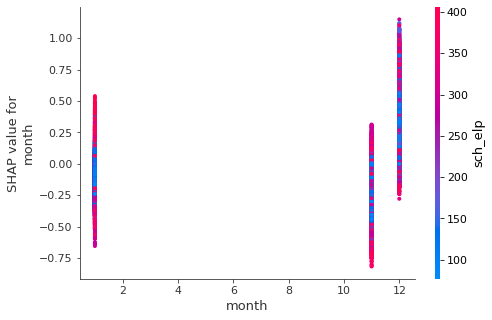

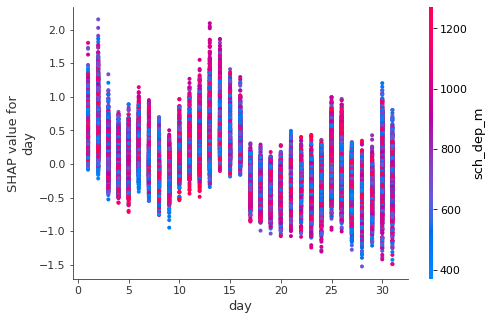

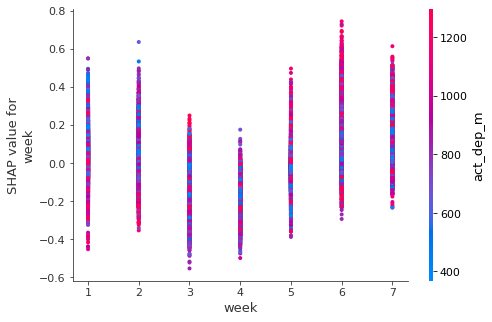

sch_dep_m 9


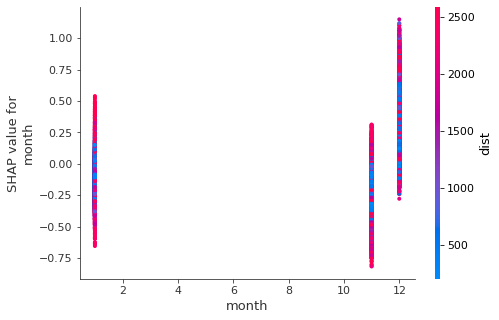

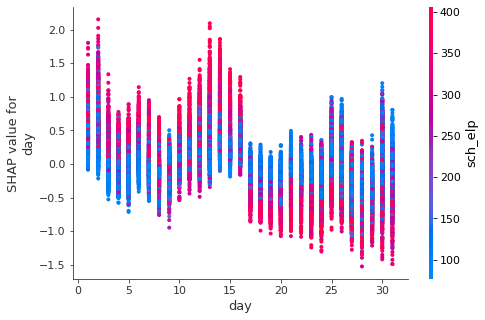

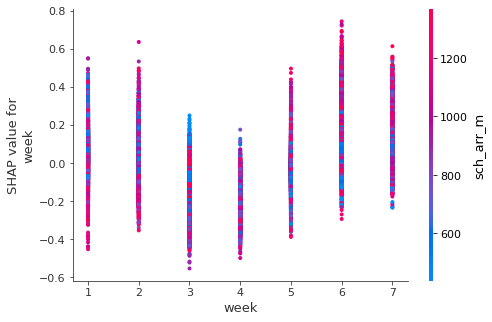

act_dep_m 10


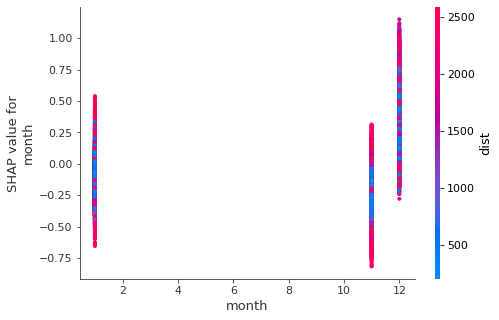

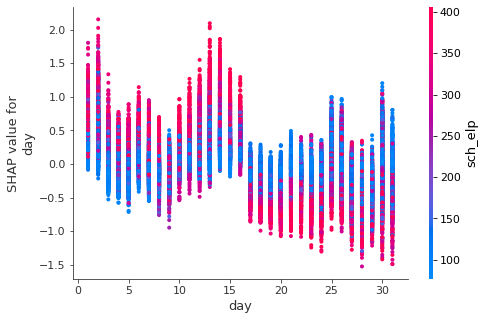

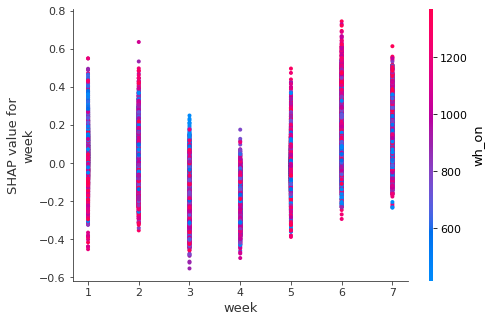

wh_off 11


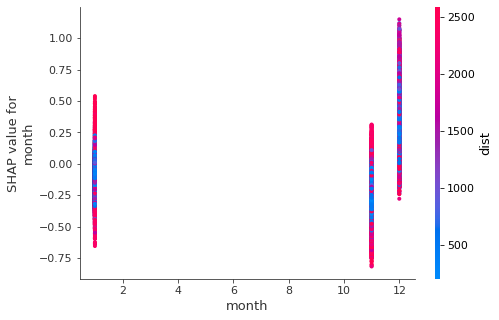

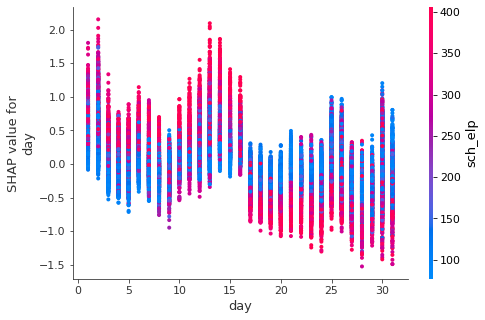

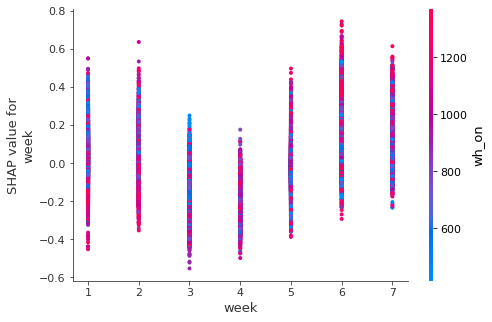

sch_arr_m 12


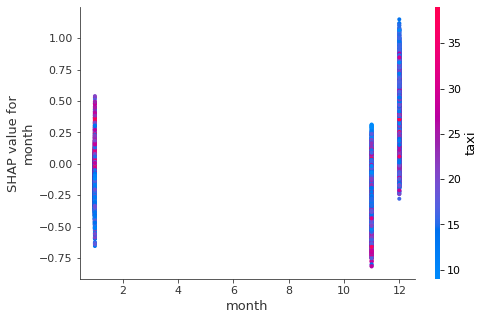

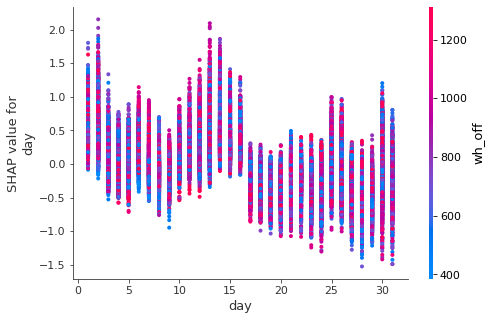

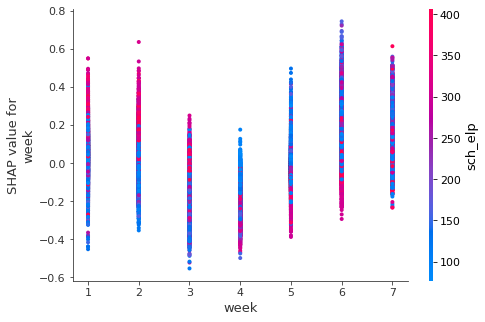

wh_on 13


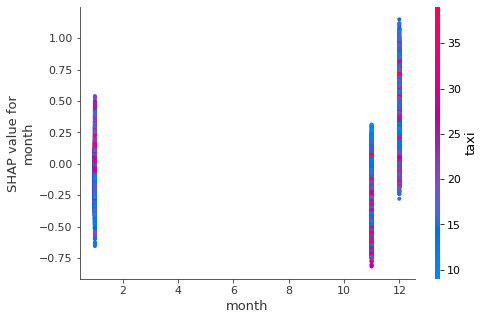

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


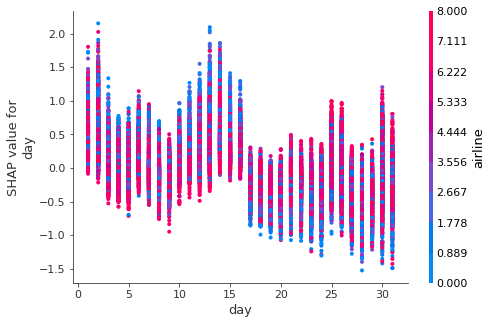

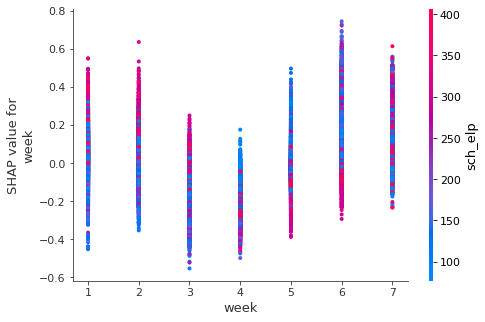

temp 14


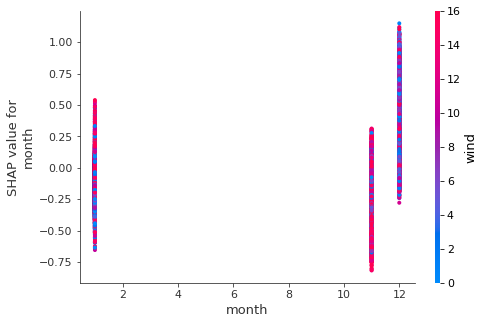

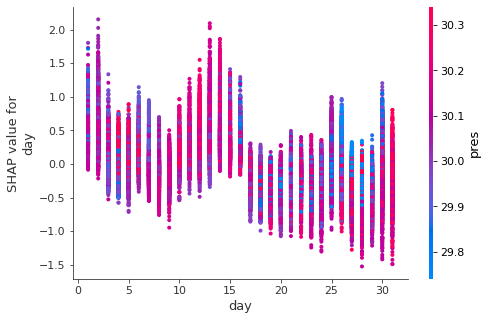

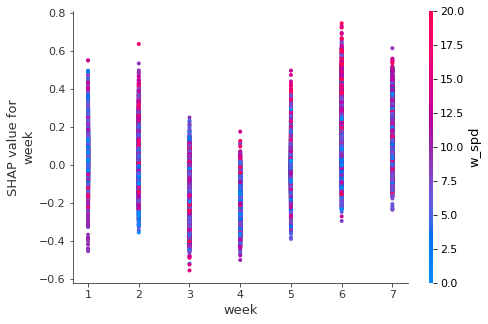

dew 15


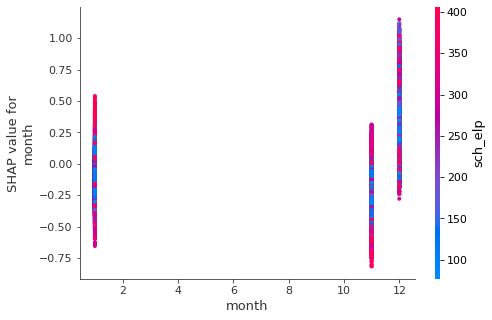

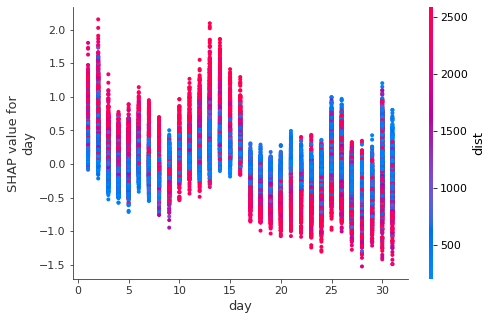

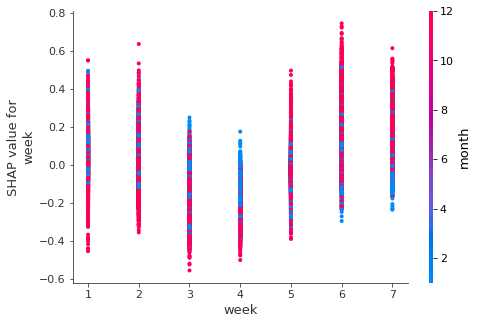

hum 16


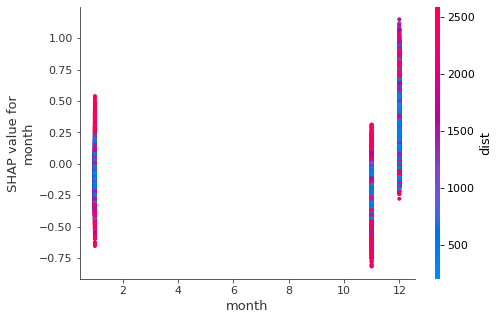

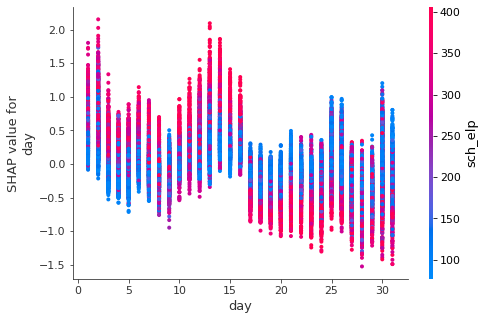

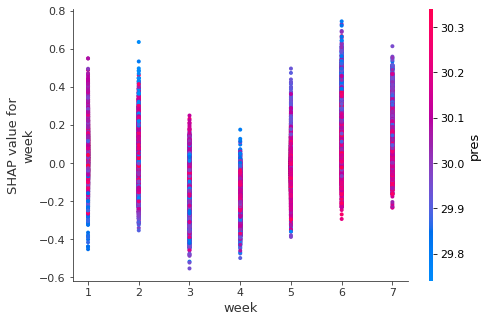

wind 17


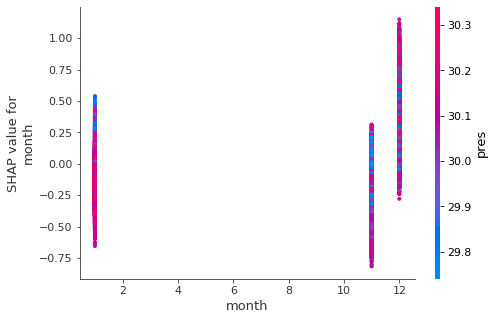

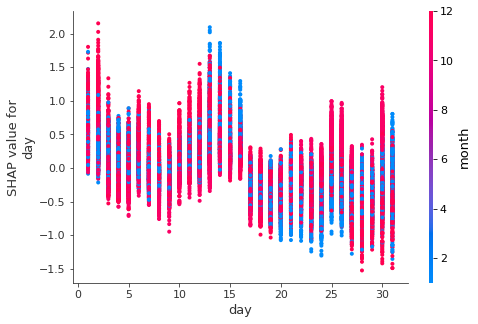

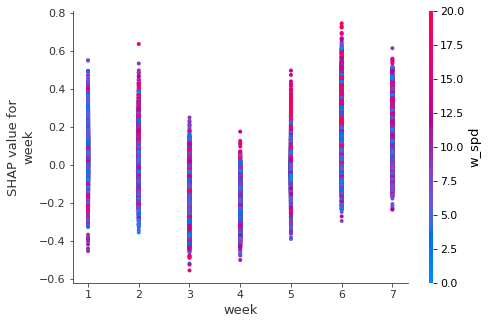

w_spd 18


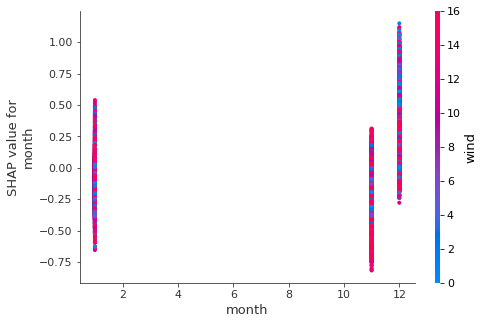

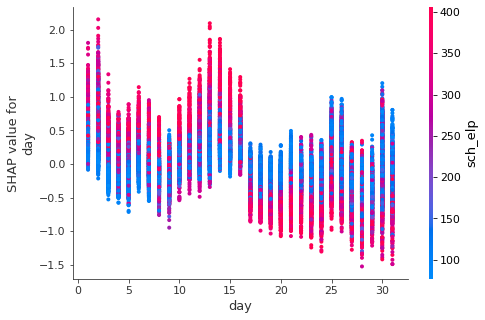

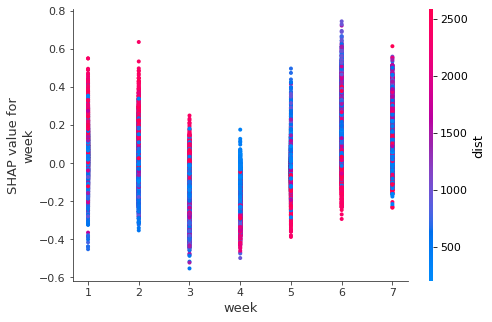

gust 19


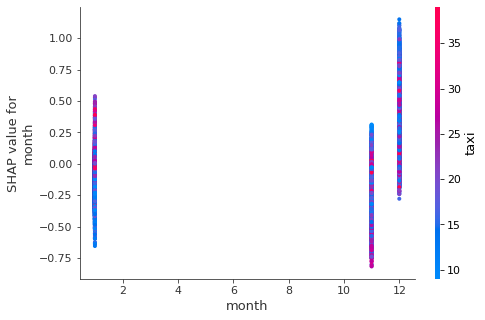

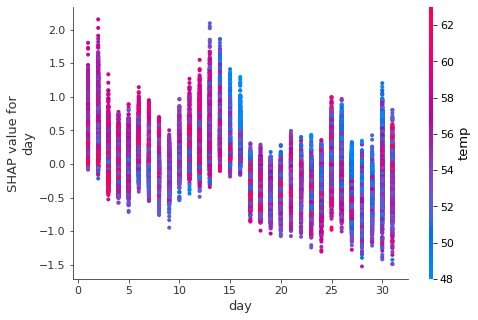

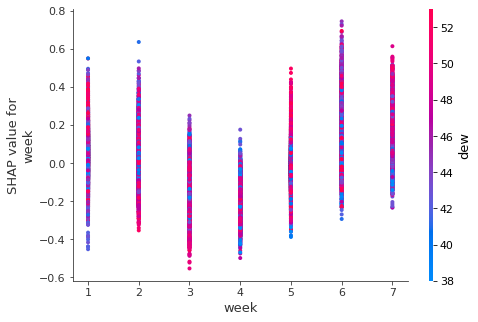

pres 20


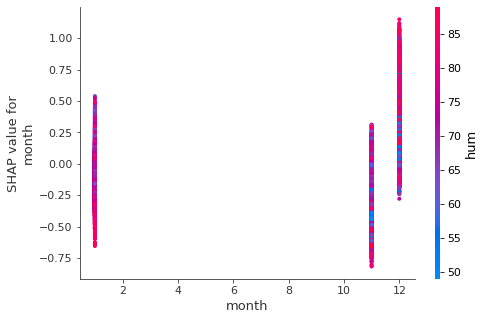

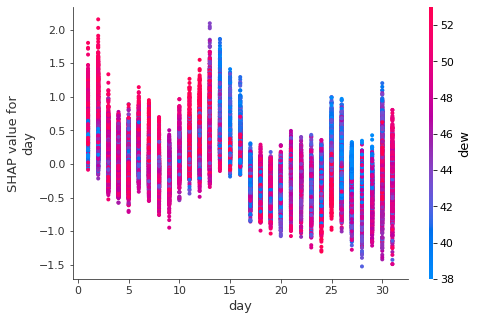

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


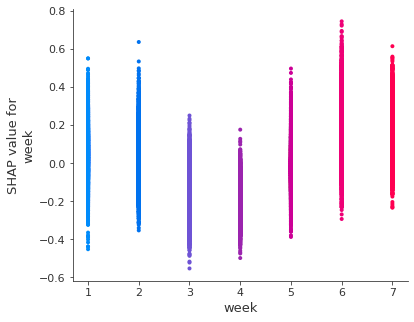

cond 21


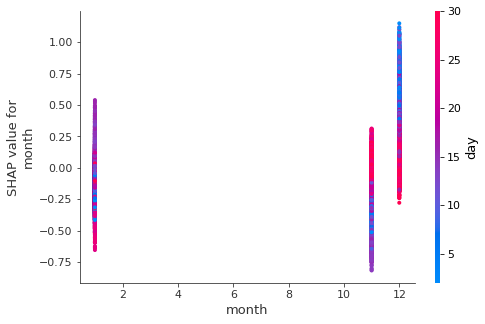

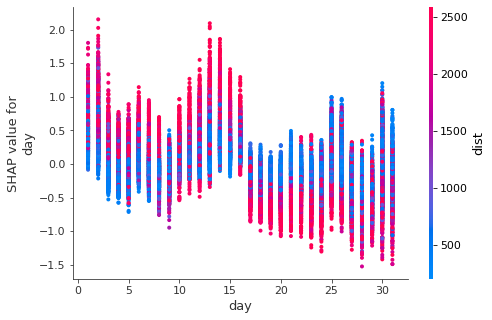

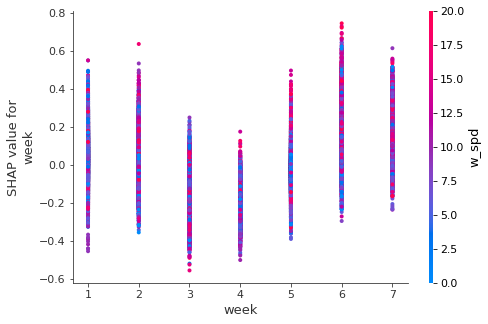

sch_dep 22


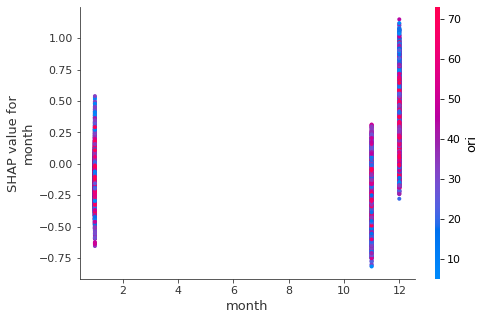

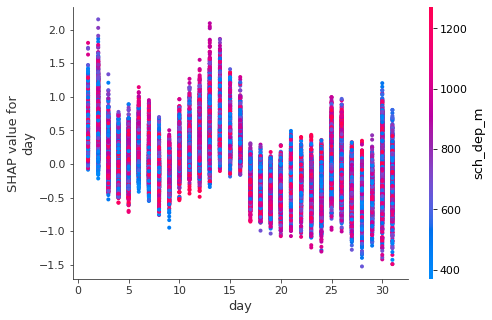

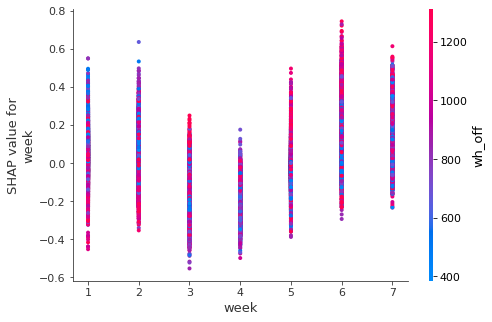

sch_arr 23


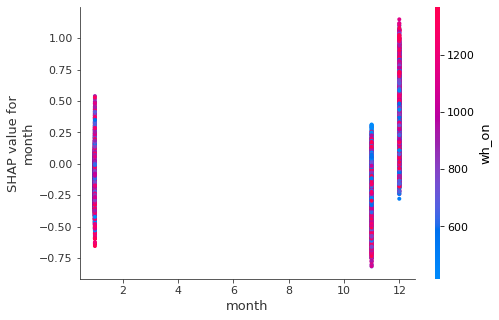

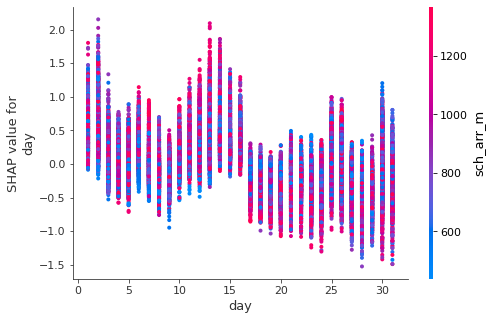

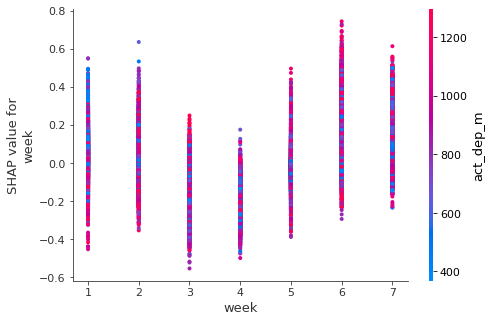

In [30]:
#this is obtained per class
for i in range(0,len(x3.columns)):
    print(x3.columns[i],i)
    inds = shap.approximate_interactions(i,shap_values[1], x3)
    for i in range(3):
        shap.dependence_plot(x3.columns[i], shap_values[1], x3, interaction_index=inds[i])

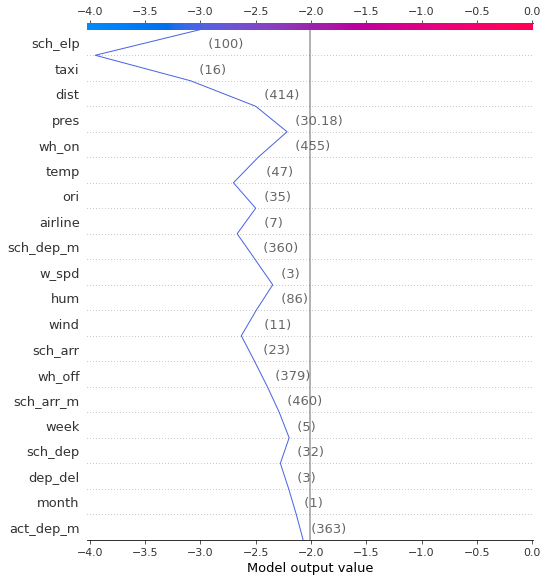

In [38]:
#for thresholds
shap.decision_plot(explainer.expected_value, shap_values[1][:1], x3.iloc[:1])